# <span style = "color:#5dac75">Teorik Notlar</span> 

## <span style="color:red;">Perceptron :</span> 

Sinir ağlarının en küçük yapsıdır(nöron). Bu       yapılar genel olarak girdi alıp çıktı sağlarlar.
Bu yapılar girilen girdiler için en doğru vercek
denklemi oluşturmaya, öğrenmeye çalışırlar. Bunu yaparkende ağırlık, bias gibi değerleri değiştirirler.            

Üç katman vardır. Input layer, hidden layer ve output layer. Hidden layer'da iç katman sayısı iki ve ikiden fazla ise buna deep network denir.

## <span style="color:red;">Aktivasyon Fonksiyonları :</span> 

<span style="color:#62a4b9;">Sigmoid fonksiyonu:</span> <br>
0 ile 1 arasında değer alır.<br>
Genelde sınıflandırma problemlerinde işimize yarar.<br>
<span style="color:#62a4b9;">Tanh (Hiperbolik Tanjant) fonksiyonu:</span>
<br>
-1 ile 1 arasında değer alır.<br>
Negatif değerlerle daha geniş bir kapsam sağlar ve genelde sınıflandırma problemlerinde işimize yarar.<br>
<span style="color:#62a4b9;">ReLU (Rectified Linear Unit):</span><br>
0 ile sonsuz arasında değer alır.<br>
Derin öğrenme alanında sıkça karşımıza çıkar.<br>
<span style="color:#62a4b9;">Linear Fonksiyonlar :</span><br>
f(x) = x<br>
Sonsuz değer alabilir fakat non-linear olmaması sebebiyle modellerde sorunlara yol açabilir.

# <span style = "color:#5dac75">Kod Örnekleri</span> 

In [5]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [6]:
dataFrame = pd.read_excel("bisiklet_fiyatlarii.xlsx")

In [7]:
dataFrame.head(10)

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
5,950.221425,1749.463071,1751.099011
6,972.099912,1750.482746,1750.778662
7,730.747018,1750.724858,1748.037351
8,653.006430,1750.029061,1747.332994
9,1108.363012,1749.834880,1752.790342


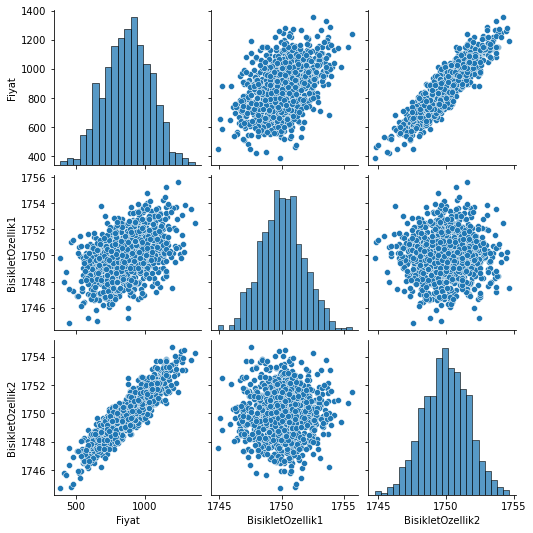

In [8]:
sbn.pairplot(dataFrame)

## Veriyi test/train olarak bölmek

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#train_test_split()

Yukarda verilen fonksiyonun aldığı parametrelere bak;<br>
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
şeklinde giriş alıyor.
yani dizi olarak alıyor ayıracağı verileri.

In [11]:
# y = ax + b
# y -> label
# x -> feataure

y = dataFrame["Fiyat"].values # numpy dizisi olarak alıyor
x = dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values # numpy dizisi olarak alıyor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [12]:
x_train.shape

(670, 2)

In [13]:
x_test.shape

(330, 2)

### Scaling ==> boyut küçültmek

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler() # bu sınıftan bir nesne oluşturduk

In [16]:
scaler.fit(x_train) # Bununla ilgili araştırma yap

MinMaxScaler()

In [19]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# Örneğin, bir veri setinde "yaş" 
# özelliği 18-80 aralığında olabilirken, 
# "gelir" özelliği 20.000-500.000 aralığında 
# olabilir. MinMaxScaler yöntemi, bu iki özellik
# için de minimum ve maksimum değerleri kullanarak,
# verileri 0 ile 1 arasında bir değere ölçeklendirir.
# Bu sayede, farklı aralıklarda olan özellikler,
# aynı ölçekte karşılaştırılabilir hale gelir.

In [18]:
x_train.shape

(670, 2)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))

# Burada her add aslında sitede(playground.tensorflow.org) 
# eklediğimiz hidden layers'lardaki katmanlar oluyor
# activation ile de aktivasyon fonksiyonumuzu seçiyoruz
# herbirinin içinde yazdığımız "5" de o katmanda kaç
# tane nöron olacak onu gösteriyor.

model.add(Dense(1)) # Burada output layer'ı oluşturuyoruz

model.compile(optimizer= "rmsprop", loss= "mse")

# optimizer parametresi, modelin ağırlıklarını
# nasıl güncelleyeceğini belirleyen algoritmayı seçer.
# Burada "rmsprop" optimizerı seçilmiştir. "rmsprop",
# Root Mean Square Propagation kısaltmasıdır ve 
# özellikle derin öğrenme modellerinde sık 
# kullanılan bir optimizer türüdür.

# loss parametresi ise, modelin performansını
# ölçen bir kayıp fonksiyonu (loss function) seçer.
# Kayıp fonksiyonu, gerçek etiketler ile modelin 
# tahminleri arasındaki farkı hesaplayarak, modelin
# ne kadar iyi öğrendiğini ölçer. Burada "mse" 
# (mean squared error) kayıp fonksiyonu seçilmiştir. 
# "mse", ortalama kare hatası anlamına gelir ve yaygın
# olarak kullanılan bir kayıp fonksiyonudur.

# Epoch sayısı, modelin eğitim verilerine ne kadar 
# süre boyunca maruz kalacağını belirler.
# model 250 epoch boyunca eğitilir ve her epoch 
# sonunda eğitim verileri üzerindeki performansı kaydedilir.

In [18]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 2s 2ms/step - loss: 795606.1875
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795227.3750
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 794829.0625
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794393.7500
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 793928.6875
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 793419.8750
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 792854.3125
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 792232.0625
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 791541.6875
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 790785.9375
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 789955.3125
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

21/21 [==============================] - 0s 5ms/step - loss: 398.0821
Epoch 193/250
21/21 [==============================] - 0s 4ms/step - loss: 377.3664
Epoch 194/250
21/21 [==============================] - 0s 4ms/step - loss: 353.5722
Epoch 195/250
21/21 [==============================] - 0s 3ms/step - loss: 333.6925
Epoch 196/250
21/21 [==============================] - 0s 3ms/step - loss: 312.9276
Epoch 197/250
21/21 [==============================] - 0s 4ms/step - loss: 290.8870
Epoch 198/250
21/21 [==============================] - 0s 5ms/step - loss: 270.9850
Epoch 199/250
21/21 [==============================] - 0s 4ms/step - loss: 252.8050
Epoch 200/250
21/21 [==============================] - 0s 4ms/step - loss: 239.6528
Epoch 201/250
21/21 [==============================] - 0s 4ms/step - loss: 225.5111
Epoch 202/250
21/21 [==============================] - 0s 4ms/step - loss: 212.0810
Epoch 203/250
21/21 [==============================] - 0s 4ms/step - loss: 199.2059
Epoch 

In [19]:
los = model.history.history["loss"]

<AxesSubplot:>

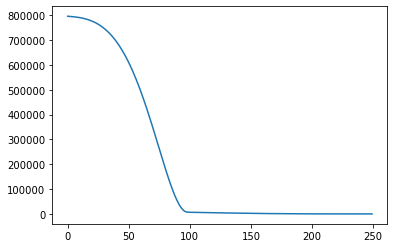

In [20]:
sbn.lineplot(x=range(len(los)), y=los)

In [21]:
trainLos = model.evaluate(x_train, y_train, verbose=0)

# Burada model.evaluate ile modeli değerlendiriyoruz.
# Bu değerlendirmenin birini train diğerini test için yaparak
# ne kadar birbirine yakın olduklarına bakıyoruz.

In [22]:
testLos = model.evaluate(x_test, y_test, verbose=0)

In [23]:
trainLos

73.3077621459961

In [24]:
testLos

75.09516906738281

In [25]:
testPredicts = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [26]:
testPredicts

array([[1078.11   ],
       [ 624.2376 ],
       [ 876.4416 ],
       [ 894.74396],
       [ 900.03516],
       [ 452.28687],
       [ 931.52374],
       [ 991.8321 ],
       [ 941.40753],
       [1017.12427],
       [ 751.2994 ],
       [ 918.1    ],
       [ 947.97894],
       [1054.9899 ],
       [1121.6152 ],
       [ 682.0467 ],
       [1127.4208 ],
       [ 651.5694 ],
       [1155.0642 ],
       [ 886.8773 ],
       [ 893.1906 ],
       [ 717.07184],
       [ 457.20297],
       [ 612.66016],
       [ 835.3093 ],
       [1091.4484 ],
       [ 714.25085],
       [ 757.3536 ],
       [ 873.9447 ],
       [ 771.073  ],
       [ 451.86948],
       [ 783.38403],
       [ 728.7255 ],
       [ 647.3403 ],
       [ 887.1418 ],
       [ 844.2133 ],
       [1036.0302 ],
       [1023.2576 ],
       [ 845.26373],
       [ 862.6601 ],
       [ 757.5317 ],
       [1174.9753 ],
       [1097.9261 ],
       [1088.1107 ],
       [ 873.3757 ],
       [ 597.071  ],
       [1146.2506 ],
       [ 973.

In [28]:
predDf = pd.DataFrame(y_test, columns=["Real Y"])

In [29]:
predDf

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [32]:
testPredicts = pd.Series(testPredicts)

In [33]:
testPredicts

0      1078.109985
1       624.237610
2       876.441589
3       894.743958
4       900.035156
          ...     
325    1013.853577
326     791.320984
327     766.302979
328    1167.831421
329     803.315125
Length: 330, dtype: float32

In [34]:
predDf["Predict Y"] = testPredicts

In [35]:
predDf

,Real Y,Predict Y
0,1081.652164,1078.109985
1,622.675990,624.237610
2,889.356810,876.441589
3,902.826733,894.743958
4,897.662404,900.035156
...,...,...
325,1028.438035,1013.853577
326,789.934950,791.320984
327,758.490486,766.302979
328,1172.871659,1167.831421


<AxesSubplot:xlabel='Real Y', ylabel='Predict Y'>

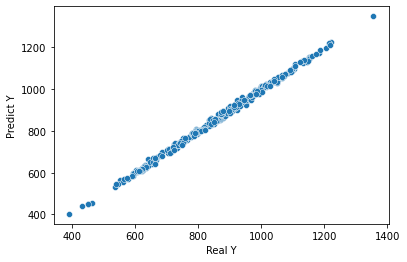

In [37]:
sbn.scatterplot(x = "Real Y", y = "Predict Y", data = predDf)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(predDf["Real Y"], predDf["Predict Y"])

# Bu bizim aslında sapmamızı gösteriyor. Bun iyi mi kötü mü ?
# sorusu ne yaptığımıza göre değişir. Bizim öreneğimizde verilen
# şey bisiklet özellikleri ve fiyatıydı. Yani aslında tahmin
# edilen şey bisiklet fiyatı diyebiliriz. Ve aşağıdaki değer
# kadar sapmamız var.

6.936596043022016

In [41]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [42]:
# Yukarda modelimize test verilerini verdik. Bu test değerlerine
# ait tahminler elde ettik. Şimdi test etmek istediğimiz şeyi
# bu şekil toplu vermek yerine tek tek vermek istiyoruz.

newBiCycleFeat = [[1751, 1749]] # yeni bir bisk. tanımladık
newBiCycleFeat = scaler.transform(newBiCycleFeat)

# tanımladığımız yeni bisk. özelliklerini küçülttük.

In [43]:
model.predict(newBiCycleFeat)

1/1 [==============================] - 0s 410ms/step


array([[826.14905]], dtype=float32)

In [44]:
# modelimiz yeni verdiğimiz değerler için bize bir tahmini fiyat
# verdi. Şimdi modelimizi kaydedelim.

from tensorflow.keras.models import load_model

In [45]:
model.save("bisiklet_modeli.h5") # burada kaydettik

In [46]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5") # burada kaydettiğimiz modeli tekrar çağırdık.

In [47]:
sonradanCagirilanModel.predict(newBiCycleFeat)

1/1 [==============================] - 0s 153ms/step


array([[826.14905]], dtype=float32)